In [1]:
%matplotlib inline
from pylab import *
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
from treatment_sims_2023_06_02 import *

Splikes version  0.1.2
Plasticnet version  0.1.9
macOS-10.16-x86_64-i386-64bit


In [3]:
base='sims/2023-06-11'
if not os.path.exists(base):
    print(f"mkdir {base}")
    os.mkdir(base)

## Just do the atropine

## blur 6, mu_c 3, sigma_c=1  vs mu_c (0 to 20) and sigma_c (0 to 6)


In [4]:
rf_size=19
eta=1e-6
number_of_neurons=25
number_of_processes=4

Nsim=21
mu_c_mat=array( list(linspace(0,20,Nsim))+ [3]*Nsim )
sigma_c_mat=array([1]*Nsim + list(linspace(0,6,Nsim)))
blur_mat=array([6]*Nsim*2)
blur_mat,mu_c_mat,sigma_c_mat




(array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20.,  3.,  3.,  3.,  3.,  3.,
         3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
         3.,  3.,  3.]),
 array([1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
        1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 0. , 0.3, 0.6, 0.9, 1.2,
        1.5, 1.8, 2.1, 2.4, 2.7, 3. , 3.3, 3.6, 3.9, 4.2, 4.5, 4.8, 5.1,
        5.4, 5.7, 6. ]))

In [10]:
from collections import namedtuple
params = namedtuple('params', ['count', 'eta','noise','blur','number_of_neurons','sfname','mu_c','sigma_c'])
all_params=[]
count=0
eta_count=0
open_eye_noise=0.1


for mu_c,sigma_c,blur in zip(mu_c_mat,sigma_c_mat,blur_mat):
    all_params.append(params(count=count,
                 eta=eta,
                 noise=open_eye_noise,
                     blur=blur,
                 number_of_neurons=number_of_neurons,
     sfname=f'{base}/atropine {number_of_neurons} neurons {mu_c} mu_c {sigma_c} sigma_c {blur} blur {open_eye_noise:.1f} noise.asdf',
                mu_c=mu_c,sigma_c=sigma_c))

    count+=1

for a in all_params[:5]:
    print(a)
print("[....]")
for a in all_params[-5:]:
    print(a)


for a in all_params[:5]:
    print(a)
print("[....]")
for a in all_params[-5:]:
    print(a)



params(count=0, eta=1e-06, noise=0.1, blur=6, number_of_neurons=25, sfname='sims/2023-06-11/atropine 25 neurons 0.0 mu_c 1.0 sigma_c 6 blur 0.1 noise.asdf', mu_c=0.0, sigma_c=1.0)
params(count=1, eta=1e-06, noise=0.1, blur=6, number_of_neurons=25, sfname='sims/2023-06-11/atropine 25 neurons 1.0 mu_c 1.0 sigma_c 6 blur 0.1 noise.asdf', mu_c=1.0, sigma_c=1.0)
params(count=2, eta=1e-06, noise=0.1, blur=6, number_of_neurons=25, sfname='sims/2023-06-11/atropine 25 neurons 2.0 mu_c 1.0 sigma_c 6 blur 0.1 noise.asdf', mu_c=2.0, sigma_c=1.0)
params(count=3, eta=1e-06, noise=0.1, blur=6, number_of_neurons=25, sfname='sims/2023-06-11/atropine 25 neurons 3.0 mu_c 1.0 sigma_c 6 blur 0.1 noise.asdf', mu_c=3.0, sigma_c=1.0)
params(count=4, eta=1e-06, noise=0.1, blur=6, number_of_neurons=25, sfname='sims/2023-06-11/atropine 25 neurons 4.0 mu_c 1.0 sigma_c 6 blur 0.1 noise.asdf', mu_c=4.0, sigma_c=1.0)
[....]
params(count=37, eta=1e-06, noise=0.1, blur=6, number_of_neurons=25, sfname='sims/2023-06-11/

In [11]:
blur

6

## Functions for atropine

In [12]:
def run_one_continuous_blur_jitter(params,
                                    overwrite=False,
                                 run=True):
    import plasticnet as pn
    count,eta,noise,blur,mu_c,sigma_c,number_of_neurons,sfname=(params.count,params.eta,params.noise,
                        params.blur,
                        params.mu_c,params.sigma_c,params.number_of_neurons,params.sfname)
    
    if not overwrite and os.path.exists(sfname):
        return sfname
    
    deficit_base_sim=f'{base}/deficit {number_of_neurons} neurons {mu_c} mu_c {sigma_c} sigma_c {4} blur.asdf'
    
    seq=pn.Sequence()
    seq+=treatment_jitter(blur=blur,
                   noise=0.1,
                   noise2=noise,  # treated (strong-eye) noise
                   total_time=8*day,number_of_neurons=params.number_of_neurons,
                    mu_c=mu_c,sigma_c=sigma_c,
                   eta=eta,
                   save_interval=20*minute)
    

    if run:
        seq_load(seq,deficit_base_sim)    
        seq.run(display_hash=False)
        pn.save(sfname,seq) 

    return sfname
        

In [13]:
func=run_one_continuous_blur_jitter

## Premake the image files

In [9]:
base_image_file='asdf/bbsk081604_all_scale2.asdf'
print("Base Image File:",base_image_file)


# somehow calling these functions breaks the multiprocessing?
# Process ForkPoolWorker-1:
#_pickle.UnpicklingError: NEWOBJ class argument isn't a type object


# so run this, then restart kernel, and then skip this cell
# until I can figure out why this does this
for params in all_params:
    func(params,overwrite=False,run=False)



Base Image File: asdf/bbsk081604_all_scale2.asdf


In [14]:
do_params=make_do_params(all_params)
len(do_params)

42

In [22]:
%%time
print(func.__name__)
func(all_params[0],overwrite=True)

run_one_continuous_blur_jitter
[.] Sequence Time Elapsed...3 m, 38.89 s
CPU times: user 3min 44s, sys: 1.72 s, total: 3min 45s
Wall time: 3min 46s


'sims/2023-06-02/atropine 25 neurons 0 mu_c 0 sigma_c 0 blur 0.1 noise.asdf'

In [16]:
real_time=3*60+ 46

In [17]:
if len(do_params)>13:
    for a in do_params[:5]:
        print(a)
    print("[....]")
    for a in do_params[-5:]:
        print(a)
else:
    for a in do_params:
        print(a)
    

print(len(do_params))

print(time2str(real_time*len(do_params)/number_of_processes))


params(count=0, eta=1e-06, noise=0.1, blur=6, number_of_neurons=25, sfname='sims/2023-06-11/atropine 25 neurons 0.0 mu_c 1.0 sigma_c 6 blur 0.1 noise.asdf', mu_c=0.0, sigma_c=1.0)
params(count=1, eta=1e-06, noise=0.1, blur=6, number_of_neurons=25, sfname='sims/2023-06-11/atropine 25 neurons 1.0 mu_c 1.0 sigma_c 6 blur 0.1 noise.asdf', mu_c=1.0, sigma_c=1.0)
params(count=2, eta=1e-06, noise=0.1, blur=6, number_of_neurons=25, sfname='sims/2023-06-11/atropine 25 neurons 2.0 mu_c 1.0 sigma_c 6 blur 0.1 noise.asdf', mu_c=2.0, sigma_c=1.0)
params(count=3, eta=1e-06, noise=0.1, blur=6, number_of_neurons=25, sfname='sims/2023-06-11/atropine 25 neurons 3.0 mu_c 1.0 sigma_c 6 blur 0.1 noise.asdf', mu_c=3.0, sigma_c=1.0)
params(count=4, eta=1e-06, noise=0.1, blur=6, number_of_neurons=25, sfname='sims/2023-06-11/atropine 25 neurons 4.0 mu_c 1.0 sigma_c 6 blur 0.1 noise.asdf', mu_c=4.0, sigma_c=1.0)
[....]
params(count=37, eta=1e-06, noise=0.1, blur=6, number_of_neurons=25, sfname='sims/2023-06-11/

In [18]:
if do_params:
    pool = Pool(processes=number_of_processes)
    async_results = [pool.apply_async(func, args=(p,),kwds={'overwrite':False,'run':True}) 
                             for p in do_params]
    results =[_.get() for _ in async_results]
    
results

[[[[.] Sequence Time Elapsed...4 m, 9.95 s
.] Sequence Time Elapsed...4 m, 10.15 s
.] Sequence Time Elapsed...4 m, 10.30 s
.] Sequence Time Elapsed...4 m, 10.32 s
[[[[.] Sequence Time Elapsed...4 m, 26.67 s
.] Sequence Time Elapsed...4 m, 27.09 s
.] Sequence Time Elapsed...4 m, 27.03 s
.] Sequence Time Elapsed...4 m, 27.79 s
[[[[.] Sequence Time Elapsed...4 m, 11.59 s
.] Sequence Time Elapsed...4 m, 12.33 s
.] Sequence Time Elapsed...4 m, 12.15 s
.] Sequence Time Elapsed...4 m, 13.36 s
[[[[.] Sequence Time Elapsed...4 m, 8.22 s
.] Sequence Time Elapsed...4 m, 6.91 s
.] Sequence Time Elapsed...4 m, 7.29 s
.] Sequence Time Elapsed...4 m, 8.60 s
[[[[.] Sequence Time Elapsed...4 m, 15.87 s
.] Sequence Time Elapsed...4 m, 15.08 s
.] Sequence Time Elapsed...4 m, 16.64 s
.] Sequence Time Elapsed...4 m, 15.53 s
[[[[.] Sequence Time Elapsed...4 m, 20.28 s
.] Sequence Time Elapsed...4 m, 21.75 s
.] Sequence Time Elapsed...4 m, 21.55 s
.] Sequence Time Elapsed...4 m, 22.82 s
[[[[.] Sequence Time 

['sims/2023-06-11/atropine 25 neurons 0.0 mu_c 1.0 sigma_c 6 blur 0.1 noise.asdf',
 'sims/2023-06-11/atropine 25 neurons 1.0 mu_c 1.0 sigma_c 6 blur 0.1 noise.asdf',
 'sims/2023-06-11/atropine 25 neurons 2.0 mu_c 1.0 sigma_c 6 blur 0.1 noise.asdf',
 'sims/2023-06-11/atropine 25 neurons 3.0 mu_c 1.0 sigma_c 6 blur 0.1 noise.asdf',
 'sims/2023-06-11/atropine 25 neurons 4.0 mu_c 1.0 sigma_c 6 blur 0.1 noise.asdf',
 'sims/2023-06-11/atropine 25 neurons 5.0 mu_c 1.0 sigma_c 6 blur 0.1 noise.asdf',
 'sims/2023-06-11/atropine 25 neurons 6.0 mu_c 1.0 sigma_c 6 blur 0.1 noise.asdf',
 'sims/2023-06-11/atropine 25 neurons 7.0 mu_c 1.0 sigma_c 6 blur 0.1 noise.asdf',
 'sims/2023-06-11/atropine 25 neurons 8.0 mu_c 1.0 sigma_c 6 blur 0.1 noise.asdf',
 'sims/2023-06-11/atropine 25 neurons 9.0 mu_c 1.0 sigma_c 6 blur 0.1 noise.asdf',
 'sims/2023-06-11/atropine 25 neurons 10.0 mu_c 1.0 sigma_c 6 blur 0.1 noise.asdf',
 'sims/2023-06-11/atropine 25 neurons 11.0 mu_c 1.0 sigma_c 6 blur 0.1 noise.asdf',
 '

## View the sims

In [19]:
sfname=all_params[0].sfname
R=Results(sfname)

/Users/bblais/tmp/ipykernel_96376/1582112873.py:10: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  pcolormesh(w_im[n,c,...],cmap=py.cm.gray,


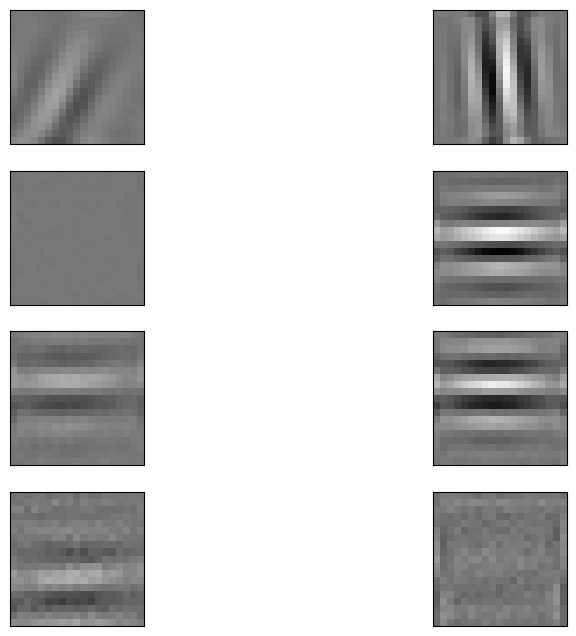

In [20]:
t,y,θ,W=R[-1]
vmin=W.min()
vmax=W.max()

w_im=R.weight_image(W)
count=1
for n in range(4):
    for c in range(2):
        subplot(4,2,count)
        pcolormesh(w_im[n,c,...],cmap=py.cm.gray,
                        vmin=vmin,vmax=vmax)
        ax2=gca()
        ax2.set_aspect('equal')
        ax2.set_xticklabels([])
        ax2.set_yticklabels([])
        ax2.xaxis.set_ticks_position('none') 
        ax2.yaxis.set_ticks_position('none') 
        
        count+=1


sims/2023-06-11/atropine 25 neurons 0.0 mu_c 1.0 sigma_c 6 blur 0.1 noise.asdf


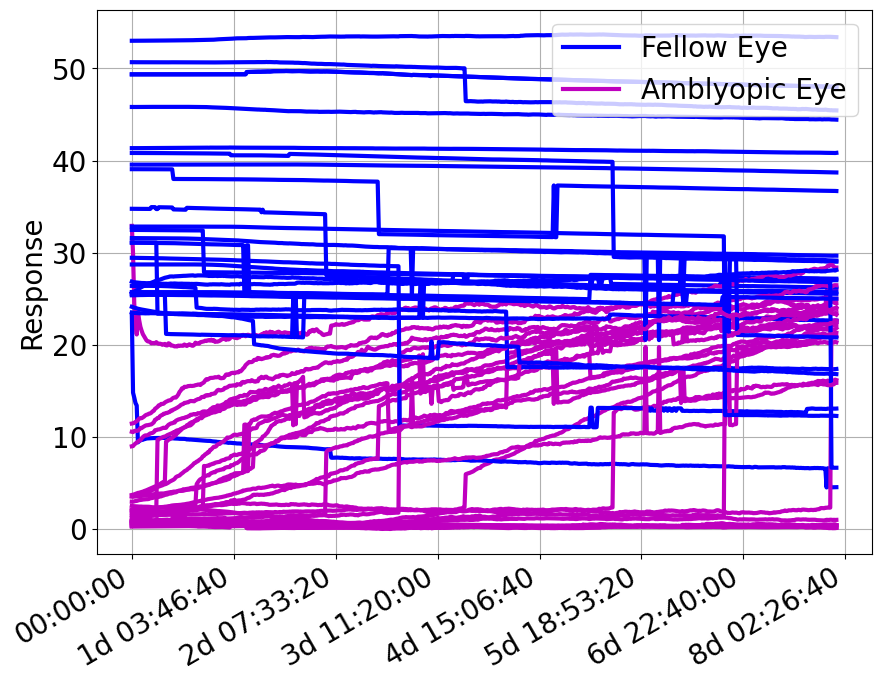

In [22]:
plot(R.t,R.y[:,0,strong_i],'b',label='Fellow Eye')
plot(R.t,R.y[:,0,weak_i],'m',label='Amblyopic Eye')

for n in range(number_of_neurons):
    plot(R.t,R.y[:,n,0],'m')
    plot(R.t,R.y[:,n,1],'b')
    
    
ylabel('Response')
legend()
print(sfname)
reformat_time_axis()   

In [21]:
RR={}
count=0
for params in tqdm(all_params):
    RR[params.sfname]=Results(params.sfname)

  0%|          | 0/42 [00:00<?, ?it/s]

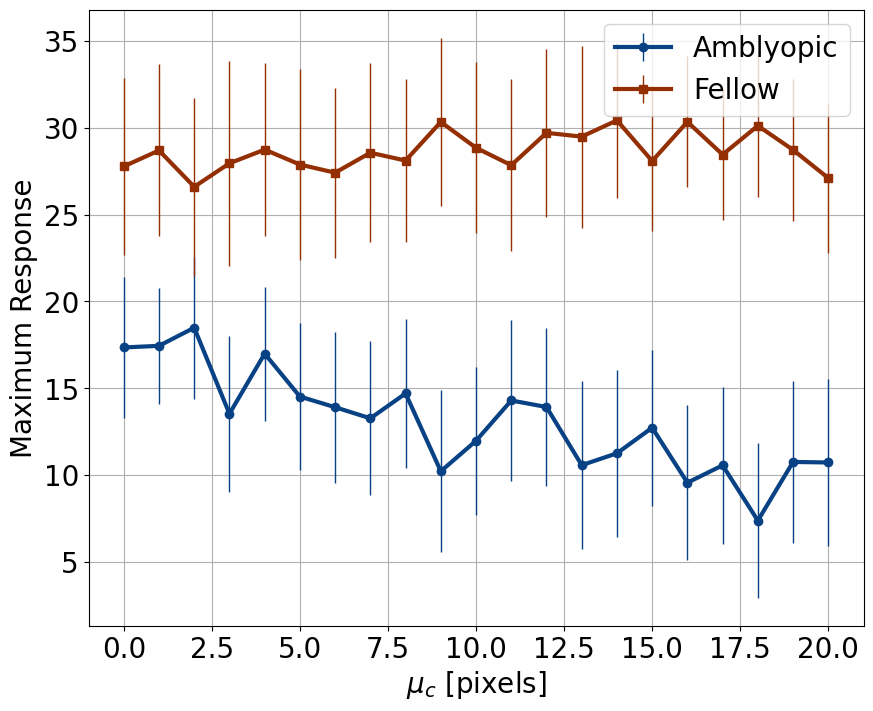

In [23]:
v=np.flip(linspace(0.3,1,Nsim))

count=0
idx=0
s=Storage()
for mu_c,sigma_c in zip(mu_c_mat[:Nsim],sigma_c_mat[:Nsim]):
    params=all_params[count]
    count+=1
    R=RR[params.sfname]
    μ1,μ2=R.μσ[0][0]
    σ1,σ2=R.μσ[1][0]

    s+=mu_c,sigma_c,μ1,μ2,σ1,σ2


mu_c,sigma_c,μ1,μ2,σ1,σ2=s.arrays()

idx=2
errorbar(mu_c,μ1,yerr=2*σ1,marker='o',elinewidth=1,label=f'Amblyopic',color=cm.Blues(v[idx]))
errorbar(mu_c,μ2,yerr=2*σ2,marker='s',elinewidth=1,label=f'Fellow',color=cm.Oranges(v[idx]))
    
xlabel('$\mu_c$ [pixels]')
ylabel('Maximum Response')
legend()    

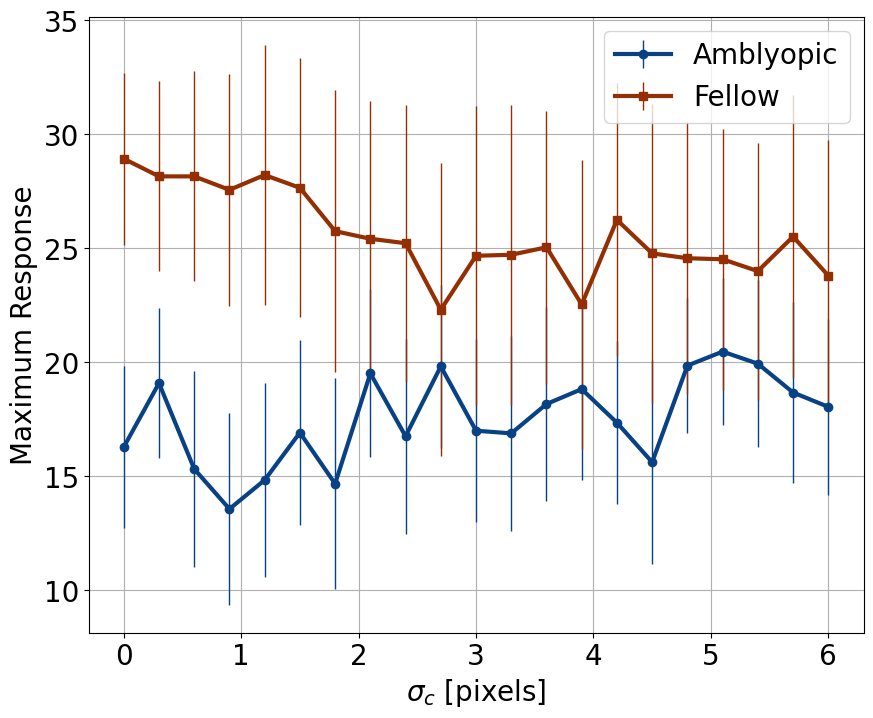

In [24]:
v=np.flip(linspace(0.3,1,Nsim))

count=0
idx=0
s=Storage()
count=Nsim
for mu_c,sigma_c in zip(mu_c_mat[Nsim:],sigma_c_mat[Nsim:]):
    params=all_params[count]
    count+=1
    R=RR[params.sfname]
    μ1,μ2=R.μσ[0][0]
    σ1,σ2=R.μσ[1][0]

    s+=mu_c,sigma_c,μ1,μ2,σ1,σ2


mu_c,sigma_c,μ1,μ2,σ1,σ2=s.arrays()

idx=2
errorbar(sigma_c,μ1,yerr=2*σ1,marker='o',elinewidth=1,label=f'Amblyopic',color=cm.Blues(v[idx]))
errorbar(sigma_c,μ2,yerr=2*σ2,marker='s',elinewidth=1,label=f'Fellow',color=cm.Oranges(v[idx]))
    
xlabel('$\sigma_c$ [pixels]')
ylabel('Maximum Response')
legend()    

Manuscript/resources/fig-patch-ODI-recovery-rate-mu-sigma.png
Manuscript/resources/fig-patch-ODI-recovery-rate-mu-sigma.svg


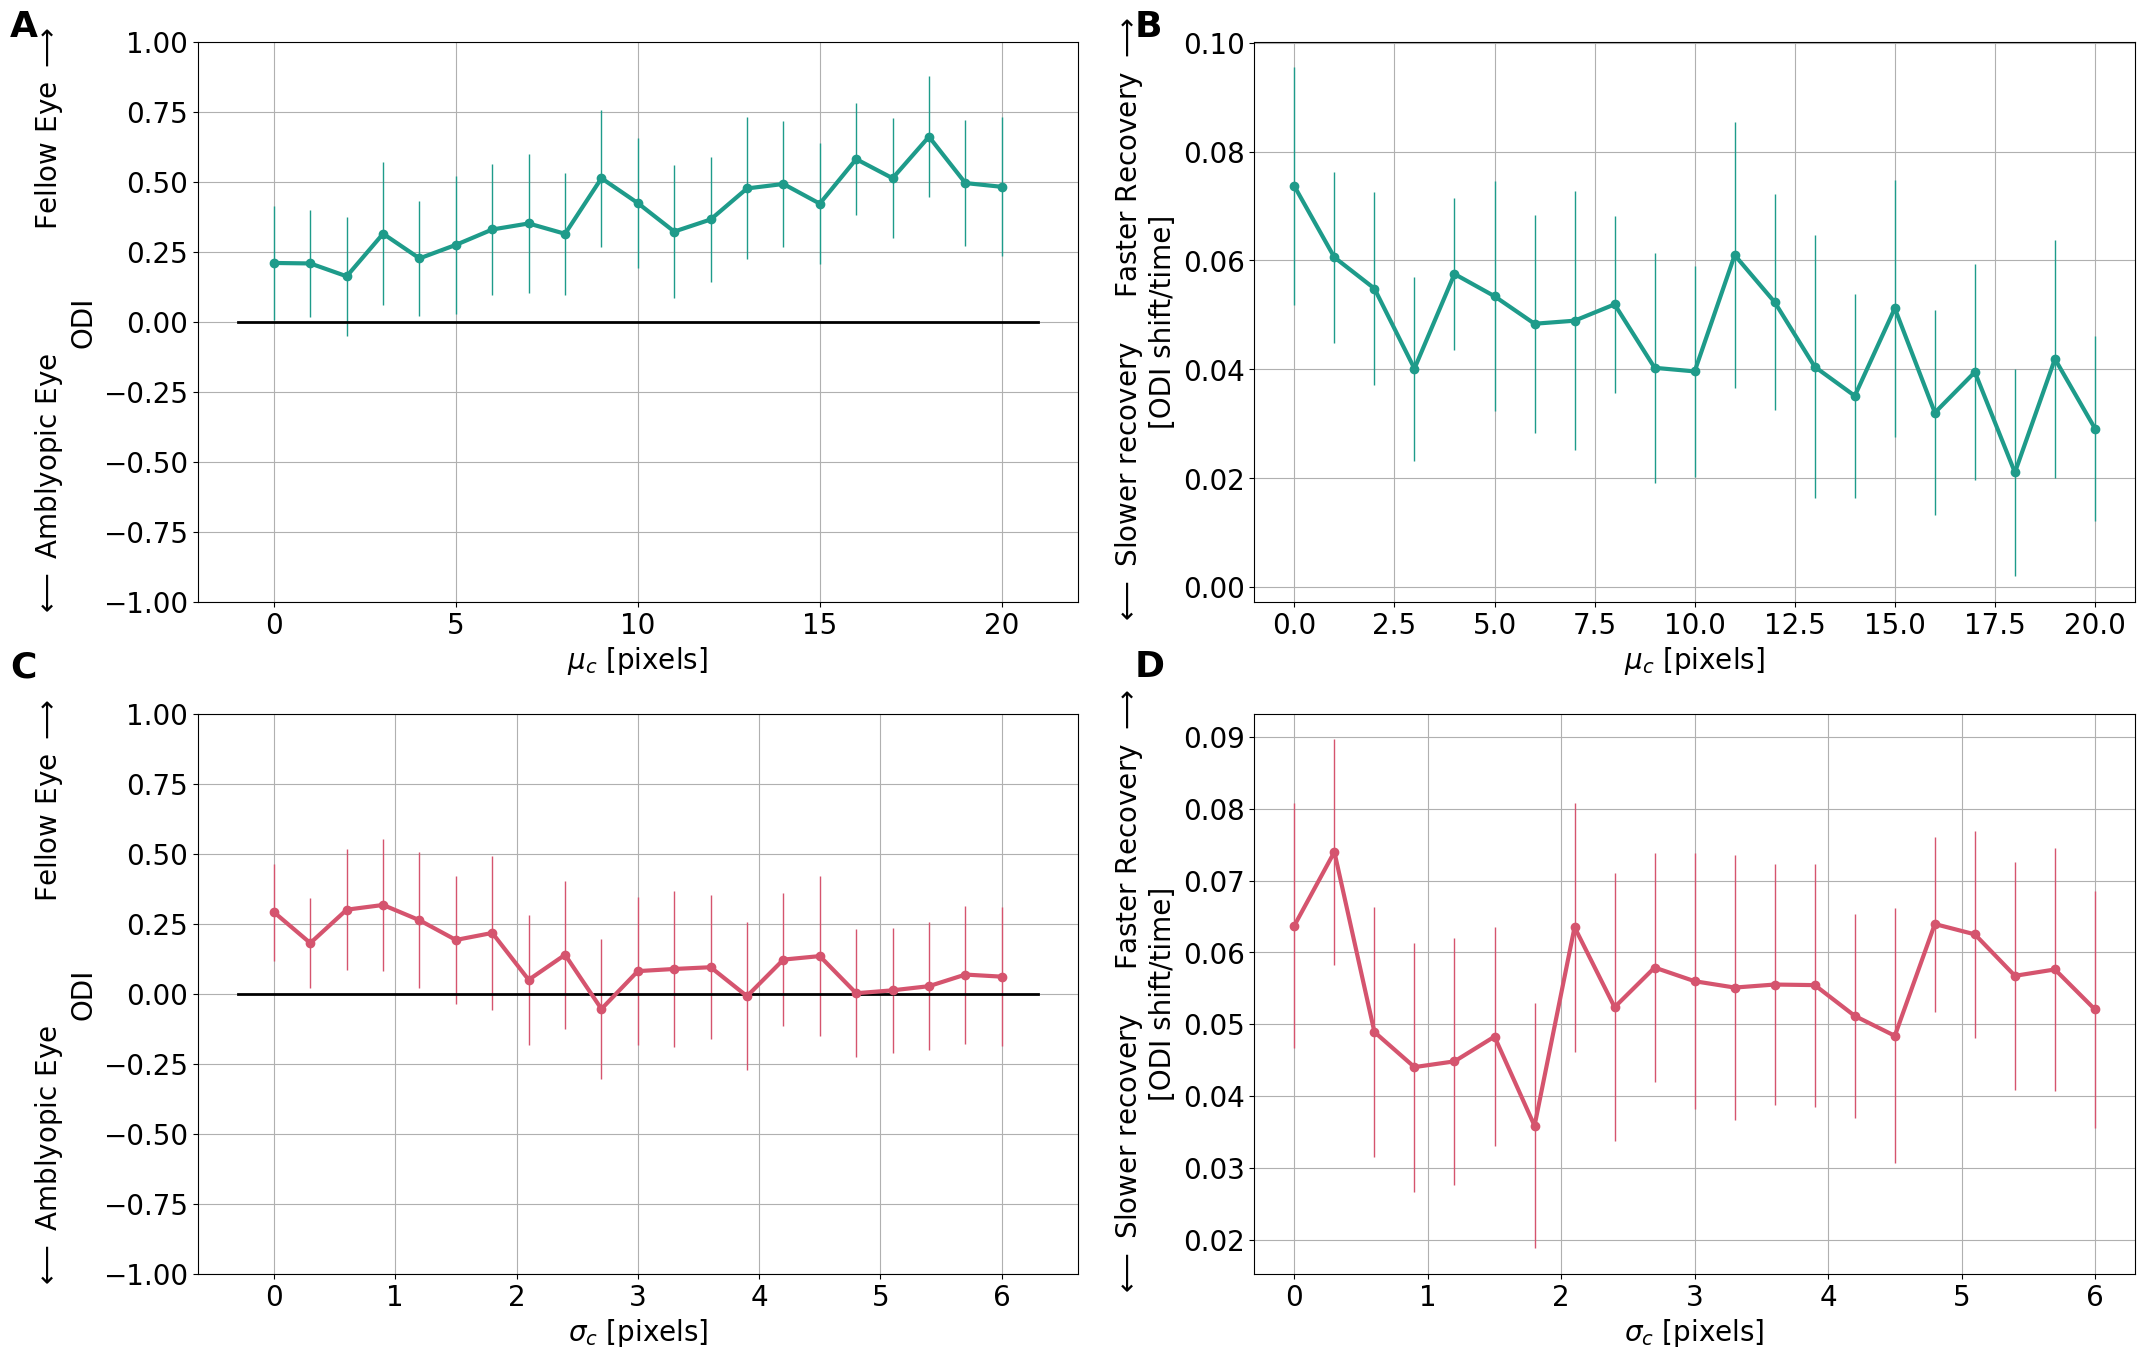

In [25]:
figure(figsize=(25,16))
subplot(2,2,1)

v=np.flip(linspace(0.3,1,Nsim))

count=0
idx=0
s=Storage()
for mu_c,sigma_c in zip(mu_c_mat[:Nsim],sigma_c_mat[:Nsim]):
    params=all_params[count]
    count+=1
    R=RR[params.sfname]
    μ,σ=μσ(R.ODI[-1])

    s+=mu_c,sigma_c,μ,σ
    

mu_c,sigma_c,μ,σ=s.arrays()

idx=13
errorbar(mu_c,μ,yerr=2*σ,marker='o',elinewidth=1,color=cm.viridis(v[idx]))
    
xlabel('$\\mu_c$ [pixels]')
ylabel(r'$\longleftarrow$ Amblyopic Eye              Fellow Eye $\longrightarrow$'+"\nODI")
ylim([-1,1])
xl=xlim()
plot(xl,[0,0],'k-',lw=2)

#savefig('fig-deficit-response-blur.png')

#========================================================
subplot(2,2,2)

v=np.flip(linspace(0.3,1,Nsim))

count=0
idx=0
s=Storage()
#count=Nsim
for mu_c,sigma_c in zip(mu_c_mat[:Nsim],sigma_c_mat[:Nsim]):
    params=all_params[count]
    count+=1
    R=RR[params.sfname]
    t=R.t/day
    μ,σ=recovery_rate_μ,recovery_rate_σ=μσ((R.ODI[-1,:]-R.ODI[0,:])/(t[-1]-t[0]))  

    s+=mu_c,sigma_c,μ,σ
    

mu_c,sigma_c,μ,σ=s.arrays()

idx=13
errorbar(mu_c,-μ,yerr=2*σ,marker='o',elinewidth=1,color=cm.viridis(v[idx]))
    
xlabel(r'$\mu_c$ [pixels]')
ylabel(r'$\longleftarrow$ Slower recovery     Faster Recovery $\longrightarrow$'+"\n[ODI shift/time]")
#savefig('fig-deficit-response-blur.png')

#========================================================
subplot(2,2,3)

v=np.flip(linspace(0.3,1,Nsim))

count=0
idx=0
s=Storage()
count=Nsim
for mu_c,sigma_c in zip(mu_c_mat[Nsim:],sigma_c_mat[Nsim:]):
    params=all_params[count]
    count+=1
    R=RR[params.sfname]
    μ,σ=μσ(R.ODI[-1])

    s+=mu_c,sigma_c,μ,σ
    

mu_c,sigma_c,μ,σ=s.arrays()

idx=13
errorbar(sigma_c,μ,yerr=2*σ,marker='o',elinewidth=1,color=cm.plasma(v[idx]))
    
xlabel('$\\sigma_c$ [pixels]')
ylabel(r'$\longleftarrow$ Amblyopic Eye              Fellow Eye $\longrightarrow$'+"\nODI")
ylim([-1,1])
xl=xlim()
plot(xl,[0,0],'k-',lw=2)

#savefig('fig-deficit-response-blur.png')

#========================================================
subplot(2,2,4)


v=np.flip(linspace(0.3,1,Nsim))

count=0
idx=0
s=Storage()
count=Nsim
for mu_c,sigma_c in zip(mu_c_mat[Nsim:],sigma_c_mat[Nsim:]):
    params=all_params[count]
    count+=1
    R=RR[params.sfname]
    t=R.t/day
    μ,σ=recovery_rate_μ,recovery_rate_σ=μσ((R.ODI[-1,:]-R.ODI[0,:])/(t[-1]-t[0]))  

    s+=mu_c,sigma_c,μ,σ
    

mu_c,sigma_c,μ,σ=s.arrays()

idx=13
errorbar(sigma_c,-μ,yerr=2*σ,marker='o',elinewidth=1,color=cm.plasma(v[idx]))
    
xlabel(r'$\sigma_c$ [pixels]')
ylabel(r'$\longleftarrow$ Slower recovery     Faster Recovery $\longrightarrow$'+"\n[ODI shift/time]")
#savefig('fig-deficit-response-blur.png')

plt.text(.05, 0.9, "A", transform=plt.gcf().transFigure,
    fontsize=26, fontweight='bold', va='top')

plt.text(.5, 0.9, "B", transform=plt.gcf().transFigure,
    fontsize=26, fontweight='bold', va='top')

plt.text(.05, 0.5, "C", transform=plt.gcf().transFigure,
    fontsize=26, fontweight='bold', va='top')

plt.text(.5, 0.5, "D", transform=plt.gcf().transFigure,
    fontsize=26, fontweight='bold', va='top')

savefig('fig-patch-ODI-recovery-rate-mu-sigma.png')    
